# 📊🔍Data Analysis Project - Customer Purchase Behavior Analysis📊🔍
<h3 align="center">(by Aiman Sahay)</h3> 

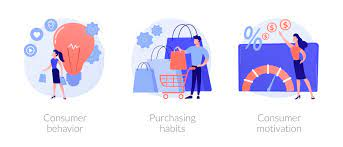

## About the Project

This end-to-end data analysis project comprises of the following activities:
- Define the problem statement.
- Gather the data.
- Data Cleaning: Identifying data types, missing values, adding new features etc.
- Analyze features using visualizations and descriptive statistics.
- Analyze probability distributions.
- Formulate and test hypothesis.
- In-depth data analysis through a variety of visualizations and metrics.
- Provide clear insights from the data analysis step.
- Summarize all the findings.
- Suggest actionable recommendations based on the insights.
- Conclusion

### 🔍 **Problem Statement**:

Analyze the Superstore Marketing Dataset containing customer information and purchasing behavior to make informed decisions. Identify patterns, trends, and correlations that will help the company optimize its marketing efforts and increase offer acceptance rates. 

### About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##### Let's Begin

### Data Cleaning

#### Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

C:\Users\aimee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\aimee\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Custom User-Defined Functions used in this Project

In [2]:
# Function to get the most_recent_date for imputation in places where the date is in incorrect format.

def most_recent_date(df, column_name, incorrect_date_format="########"):
    '''
    This function will return the most recent date from dataframe's column.
        
    Args:
        df: A Pandas DataFrame Object
        column_name: Name of the df column which contains the incorrect date format.
        incorrect_date_format: Format to be ignored to avoid errors on conversion to datetime dtype. Default value="########".
        
    Returns:
        most_recent_date (type: datetime64): The most recent date from the df column.
    '''
    
    df = df[df["Dt_Customer"] != "########"]
    df.loc[:, "Dt_Customer"] = pd.to_datetime(df.loc[:, "Dt_Customer"])
    most_recent_date = df["Dt_Customer"].max()
    
    return most_recent_date

In [3]:
# Function for setting x, y labels and titles for multiple subplots.

def plot_labels(xlabel, ylabel, title, axes_obj, axes_loc):
    '''
    This function is used to set x, y labels and titles to multiple subplots plotted as an axis object.
    
    Args:
        xlabel - str: X label text for the plot.
        ylabel - str: Y label text for the plot.
        title - str: Title for the plot.
        axes_obj: Name of the axes object
        axes_loc - int: Index location of the plot.
        
    Returns:
        xlabel, ylabel and title for the subplot.
    '''
    
    # Flatten the axes to access the subplot.
    axes = axes_obj.flatten()
    # Set labels and title
    axes[axes_loc].set_xlabel(xlabel)
    axes[axes_loc].set_ylabel(ylabel)
    axes[axes_loc].set_title(title)


In [4]:
# Function to plot multiple subplots of type - QQplot, BoxPlot, Histogram, BarPlot, CountPlot

def multiple_subplots(subplot_list, n_row, n_col, figsize, suptitle, plot_type, df, common_y_variable="", \
                      estimator="mean", suptitle_fontsize=16):
    '''
    This function creates multiple subplots of QQPlot, BoxPlot, Histogram, BarPlot, CountPlot.
    
    Args:
        subplot_list - list : This is a list of all the dataframe variables for which data is to be plotted.
        n_row - int : Number of rows for the subplots.
        n_col - int : Number of columns for the subplots.
        figsize - tuple of int : Tuple mentioning the dimension of the plotting area.
        suptitle - str : Main title or heading of the plot.
        plot_type - str : Type of plot, select from "qqplot", "boxplot", "histplot", "barplot", "countplot".
        df - Pandas DataFrame Object : A Pandas DataFrame.
        common_y_variable - str: Optional: The common y-variable for plotting bar plots, default="".
        estimator - str: Optional: The bar plot estimator, select from "mean" or "sum", defalut="mean".
        suptitle_fontsize - int : Fontsize of the main title, default value = 16
        
    Returns:
        Plotted Graphical Plots in n_row and n_col in an area of the figsize.
    '''
    
    # List of columns/variables to be plotted.
    lst = subplot_list
    
    # Create subplots with a n_row x n_col layout
    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.suptitle(suptitle, fontsize=suptitle_fontsize)
    
    # Flatten the axes array to iterate over subplots
    axes = axes.flatten()
    
    # Delete the extra subplot
    if (n_row*n_col) > len(lst):
        n_ax_to_remove = (n_row*n_col) - len(lst)
        for i in range(1, n_ax_to_remove+1):
            fig.delaxes(axes[-i])
        
    # Plot the data
    for i in range(len(lst)):
        if plot_type == "qqplot":
            sm.qqplot(df.loc[:, lst[i]], line='45', ax=axes[i])
        elif plot_type == "boxplot":
            sns.boxplot(data=df[lst[i]], ax=axes[i])
        elif plot_type == "histplot":
            sns.histplot(data=df[lst[i]], ax=axes[i], kde=True)
        elif plot_type == "countplot":
            order = df.groupby(lst[i])[common_y_variable].count().sort_values(ascending=False).index
            sns.countplot(x=lst[i], data=df, ax=axes[i], order=order)
        elif plot_type == "barplot":
            if estimator == "mean":
                order = df.groupby(lst[i])[common_y_variable].mean().sort_values(ascending=False).index
                sns.barplot(x=lst[i], y=common_y_variable, data=df, ax=axes[i], estimator=np.mean, order=order)
            elif estimator == "sum":
                order = df.groupby(lst[i])[common_y_variable].sum().sort_values(ascending=False).index
                sns.barplot(x=lst[i], y=common_y_variable, data=df, ax=axes[i], estimator=sum, order=order)
                
        axes[i].set_title(f"{lst[i]}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [5]:
# Function to test if the data follows normal distribution using the Shapiro-Wilk Test.

def shapiro_wilk_test_for_normality(df, column_name, alpha):
    test_data = df[column_name]
    shapiro_stat = shapiro(test_data)
    
    if shapiro_stat[1] < alpha:
        result = "Reject the Null Hypothesis. The data do not follow Normal Distribution."
    else:
        result = "Fail to reject the Null Hypothesis. The data follow Normal Distribution."
    
    return result

In [6]:
# Import and read data
data = pd.read_csv("Superstore Marketing Data.csv")

# Display the first 5 rows
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [7]:
# Display the shape of the dataset
data.shape

# The dataset has 2240 rows and 22 columns

(2240, 22)

In [8]:
# Display the list of columns in the dataset
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [9]:
# Display the non-null values and data types of all columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Remove duplicate rows
data = data.drop_duplicates(keep="first")

In [11]:
# Display missing values, if any.
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

It can be observed that the 'Income' column has 24 missing values (i.e. about 1.10%). To determine how to handle these, let us have a look at the distribution of the income data. If no suitable imputation method can be determined, we can simply drop those rows and it will not affect the analysis.  

It is better to work with less data than incorrect data.

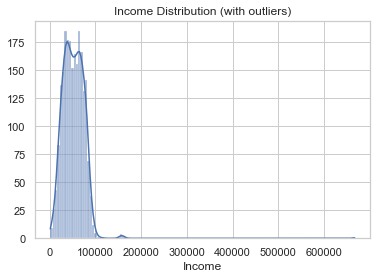

In [12]:
# Check the distribution of Income Data.
income_with_outliers = data.copy()

sns.histplot(x="Income", data=income_with_outliers, kde=True)
plt.xlabel("Income")
plt.ylabel("")
plt.title("Income Distribution (with outliers)")

plt.show()

It can be observed that the income data is positively skewed with most of the incomes falling in the range of 0 to 100000. It is inappropriate to do a mean imputation for the missing income values as the mean will take into account the outliers and hence will not be an appropriate approximation. Instead median income could be considered here for imputation.  

Let us calculate both mean and median.

In [13]:
# Calculate the mean and median

mean_income = np.nanmean(data["Income"])
median_income = np.nanmedian(data["Income"])

print(f"Mean Income: {mean_income}")
print(f"Median Income: {median_income}")

Mean Income: 52247.25135379061
Median Income: 51381.5


We can see here that the mean > median as the data is positively skewed. We could impute the missing income values with either mean or median but for this analysis, we will simply drop the rows as the number of missing values is quite small.

In [14]:
# Drop missing income rows.
data = data.dropna()

In [15]:
# Check the null values after dropping the missing values rows.
data.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [16]:
# Proportion of income falling in the range of 0 to 100000

income_upto_100k = len(data[data["Income"] <= 100000]) / len(data)

print(f"% of Customers whose income is in the range of 0 to 100000: {income_upto_100k*100:.2f}%")

% of Customers whose income is in the range of 0 to 100000: 99.41%


Since 99.41% of all customers earn an income of <= 100000, we can filter our data to include only such customers to understand the spending behaviors better.

In [17]:
income_condition = data["Income"] > 100000
data = data[~income_condition]
len(data)

2203

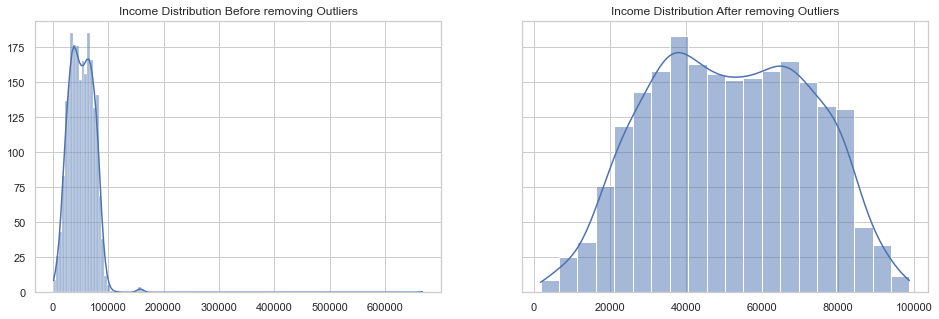

In [18]:
# Income data distribution before and after removing outliers.

fig, axes = plt.subplots(1, 2, sharey=True, figsize = (16, 5))

# Before removing outliers
sns.histplot(x="Income", data=income_with_outliers, kde=True, ax=axes[0])
plot_labels("", "", "Income Distribution Before removing Outliers", axes, 0)

# After removing outliers
sns.histplot(x="Income", data=data, kde=True, ax=axes[1])
plot_labels("", "", "Income Distribution After removing Outliers", axes, 1)

The above visualization shows that the skewness in the income data distribution is highly reduced after removing the outliers.

In [19]:
# Display the data types to check if they align with the corresponding column values.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2203 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2203 non-null   int64  
 1   Year_Birth           2203 non-null   int64  
 2   Education            2203 non-null   object 
 3   Marital_Status       2203 non-null   object 
 4   Income               2203 non-null   float64
 5   Kidhome              2203 non-null   int64  
 6   Teenhome             2203 non-null   int64  
 7   Dt_Customer          2203 non-null   object 
 8   Recency              2203 non-null   int64  
 9   MntWines             2203 non-null   int64  
 10  MntFruits            2203 non-null   int64  
 11  MntMeatProducts      2203 non-null   int64  
 12  MntFishProducts      2203 non-null   int64  
 13  MntSweetProducts     2203 non-null   int64  
 14  MntGoldProds         2203 non-null   int64  
 15  NumDealsPurchases    2203 non-null   i

Convert the data type of 'Dt_Customer' column to date as it represents the customer's 'Date of Enrolment' with the company.
But before that let us check the values in the 'Dt_Customer' column to ensure that all the values are valid dates.


In [20]:
data["Dt_Customer"].value_counts()

########      896
8/31/2012      12
2/14/2013      11
8/20/2013      10
5/22/2014      10
             ... 
10/19/2012      1
5/27/2013       1
6/13/2014       1
3/25/2013       1
5/25/2013       1
Name: Dt_Customer, Length: 400, dtype: int64

It can be seen that 896 rows do not contain valid dates. Let us convert them appropriately.  
This data will be used to calculate the customer's age. Now, since the data of customer's enrolment spans the period of 2012 to 2014, we can take any date as this will not impact our calculation of customer's age much. For consistency purposes, let the take the most recent date as customer's enrolment date.


In [21]:
# Get the most recent date using the 'most_recent_date' custom function.

most_recent_date = most_recent_date(data, "Dt_Customer")
most_recent_date

Timestamp('2014-06-29 00:00:00')

In [22]:
# Let us impute this value in the original dataframe.
data["Dt_Customer"] = data["Dt_Customer"].replace("########", most_recent_date)

# Convert the data type to datetime type.
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

In [23]:
data["Dt_Customer"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2203 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2203 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.4 KB


In [24]:
# Check the values
data["Dt_Customer"].value_counts()

2014-06-29    898
2012-08-31     12
2013-02-14     11
2014-05-22     10
2013-08-20     10
             ... 
2012-10-19      1
2013-05-27      1
2014-03-28      1
2014-06-13      1
2013-05-25      1
Name: Dt_Customer, Length: 399, dtype: int64

The data contains the column 'Year_Birth' which is the birth year of the customer. Let us create a new column called 'Age' which will be the age of the customer in years.  

We can calculate age using the following formula:
Age = Dt_Customer - Year_Birth

This will give us the Age of the customer as on the date of purchase.  

However, we need to extract the year from the 'Dt_Customer' column as 'Year_Birth' only contains the year of birth and not the date.  

Hence, for calculating age, the following needs to be done:
1. Extract the year from the date of 'Dt_Customer' column by converting the data type to date.    
2. Create a new column called 'Age' = Dt_Customer - Year_Birth  
3. Check if age values make sense. If not, handle them appropriately.

In [25]:
# Create a new column to store the extracted Year from 'Dt_Customer' column.
data["Cust_Enrol_Year"] = data["Dt_Customer"].dt.year
data["Cust_Enrol_Year"].info()

<class 'pandas.core.series.Series'>
Int64Index: 2203 entries, 0 to 2239
Series name: Cust_Enrol_Year
Non-Null Count  Dtype
--------------  -----
2203 non-null   int64
dtypes: int64(1)
memory usage: 34.4 KB


In [26]:
# Create a new column to store the Customer's Age.
data["Age"] = data["Cust_Enrol_Year"] - data["Year_Birth"]
data["Age"]

0       44
1       53
2       56
3       47
4       25
        ..
2235    38
2236    36
2237    38
2238    34
2239    45
Name: Age, Length: 2203, dtype: int64

In [27]:
# Check the descriptive statistics of Age data
data["Age"].describe()

count    2203.000000
mean       44.626419
std        12.021430
min        17.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Age, dtype: float64

It can be observed from the above table that the maximum age of a customer is 121 which seems odd. Let us check the distribution of the 'Age' variable to identify such outliers.

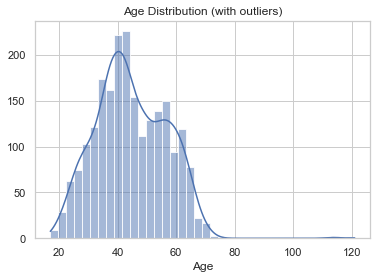

In [28]:
age_with_outliers = data.copy()

sns.histplot(x="Age", data=age_with_outliers, kde=True)
plt.xlabel("Age")
plt.ylabel("")
plt.title("Age Distribution (with outliers)")

plt.show()

Assumption: The maximum age of a customer = 80 years.

Based on this assumption, let us identify the customers with age > 80 (as all these customers can be categorized as elderly) and drop these rows to reduce skewness of the data.

In [29]:
# Identify rows where Age > 80
data[data["Age"] > 80]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Cust_Enrol_Year,Age
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,1,1,0,2,4,0,0,2014,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,224,1,4,6,4,1,0,0,2013,114
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,25,1,2,1,2,5,0,1,2013,113


Since only 3 customers are of age > 80, we can safely drop these rows and reduce the skewness in the data.

In [30]:
condition = data["Age"] > 80
data = data[~condition]
data.shape

(2200, 24)

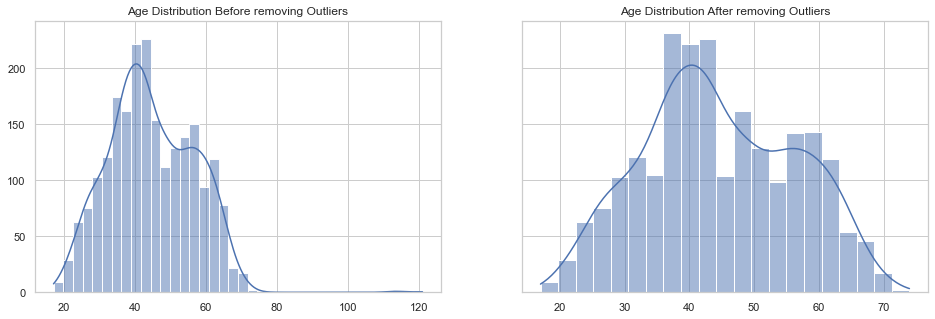

In [31]:
# Plot the age distribution data before and after removing the outliers.

fig, axes = plt.subplots(1, 2, sharey=True, figsize = (16, 5))

# Before removing outliers
sns.histplot(x="Age", data=age_with_outliers, kde=True, ax=axes[0])
plot_labels("", "", "Age Distribution Before removing Outliers", axes, 0)

# After removing outliers
sns.histplot(x="Age", data=data, kde=True, ax=axes[1])
plot_labels("", "", "Age Distribution After removing Outliers", axes, 1)

It can be observed from the above visualization that the skewness in the age distribution is highly reduced after removing the outliers.

Let us bifurcate the age into different categories by additing a new column to our dataset as "Age_Category" which will be used later in our analysis.

Create four age categories:
- 0 to 25: Youth / Students
- 26 to 40: Young Adults
- 41 to 60: Middle-aged
- Above 60: Elderly

In [32]:
# Function to assign categories based on age value.
def age_conditions(df):
    if df["Age"] <= 25:
        return "0 to 25"
    elif df["Age"] <= 40:
        return "26 to 40"
    elif df["Age"] <= 60:
        return "41 to 60"
    else:
        return "Above 60"

# Create a new column "Age_Category" using the above function.
data["Age_Category"] = data.apply(age_conditions, axis=1)

In [33]:
data["Age_Category"].value_counts()

41 to 60    1093
26 to 40     768
Above 60     238
0 to 25      101
Name: Age_Category, dtype: int64

Next, add a new column to the dataset and name it "TotalAmountSpent". This will be equal to the total amount that the customer has spent on all the purchases from the store.

$TotalAmountSpent = MntFishProducts + MntMeatProducts + MntFruits + MntSweetProducts + MntWines + MntGoldProds$

In [34]:
data["TotalAmountSpent"] = data["MntFishProducts"] + data["MntMeatProducts"] + data["MntFruits"] + data["MntSweetProducts"] + data["MntWines"] + data["MntGoldProds"]
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Cust_Enrol_Year,Age,Age_Category,TotalAmountSpent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,2014,44,41 to 60,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,2014,53,41 to 60,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,3,2,5,2,0,0,2014,56,41 to 60,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-06-29,0,10,...,1,0,2,7,0,0,2014,47,41 to 60,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-06-29,0,6,...,3,1,2,7,1,0,2014,25,0 to 25,91


In [35]:
# Check the shape, first five rows and data type of the final cleaned dataset.
print(f"Shape of cleaned dataset:{data.shape}\n")
print(f"First five rows:\n{data.head()}\n")
print(f"Data Types:")
data.info()

Shape of cleaned dataset:(2200, 26)

First five rows:
      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebPurchases  NumCatalogPurchases  \
0  2014-06-16        0       189  ...                4                    4   
1  2014-06-15        0       464  ...                7                    3   
2  2014-05-13        0       134  ...                3                    2   
3  2014-06-29        0        10  ...                1                    0   
4  2014-06-29        0         6  ...                3                    1 

This is the final cleaned dataset consisting of 2200 rows and 26 columns which will now be used for the customer purchase behavior analysis.

In [36]:
# Export the cleaned dataset to a csv file
cleaned_data = data.to_csv("SuperStore Marketing_cleaned.csv")

### Analyze features using Visualizations and Descriptive Statistics

#### Visualize Customer Demographics (Age, Education, Marital Status)

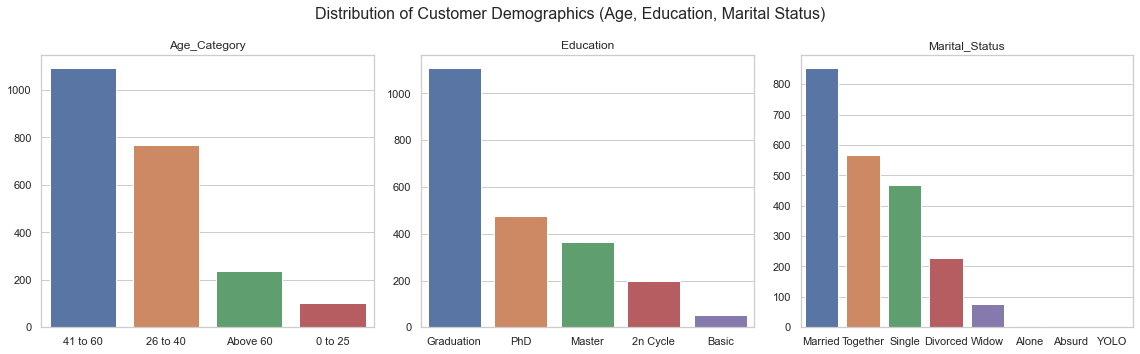

In [37]:
# Create plots to visualize customer demographics

subplot_list = ["Age_Category", "Education", "Marital_Status"]
title = "Distribution of Customer Demographics (Age, Education, Marital Status)"

multiple_subplots(subplot_list, 1, 3, (16,5), title, "countplot", data, common_y_variable="Id")

Observation: Most of the customer's are in the Age Group of 41 to 60 years, are Graduates and are Married.

#### Summary Statistics of Key Numerical Variables

We already dealt with outliers in the 'Age' and 'Income' variables while determining their distribution. Let us check the descriptive statistics for similar observations in other key variables.

In [38]:
# Descriptive Statistics summary of key variables

data[['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
      'NumStorePurchases', 'NumWebVisitsMonth','Age']].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,51500.314545,0.443182,0.507727,49.041818,305.647727,26.287273,165.328182,37.680909,26.870455,43.891818,2.323182,4.085000,2.635909,5.814545,5.343636,44.529091
std,20577.132323,0.537328,0.544462,28.932517,337.213549,39.604597,217.914581,54.763031,40.618390,51.554499,1.885443,2.693288,2.790010,3.231013,2.411716,11.736072
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,35178.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,36.000000
50%,51222.500000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,43.000000
75%,68130.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,54.000000
max,98777.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,198.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,74.000000


From an overview of the descriptive statistics above, there could be some outliers in the dataset. We can visualize this using box plots.

For calculating descriptive statistics, we are interested only in the following key numerical variables as they will present meaningful values of central tendencies, dispersion and potential outliers in the dataset.

- Income
- Kidhome
- Teenhome
- Recency
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebVisitsMonth
- Age

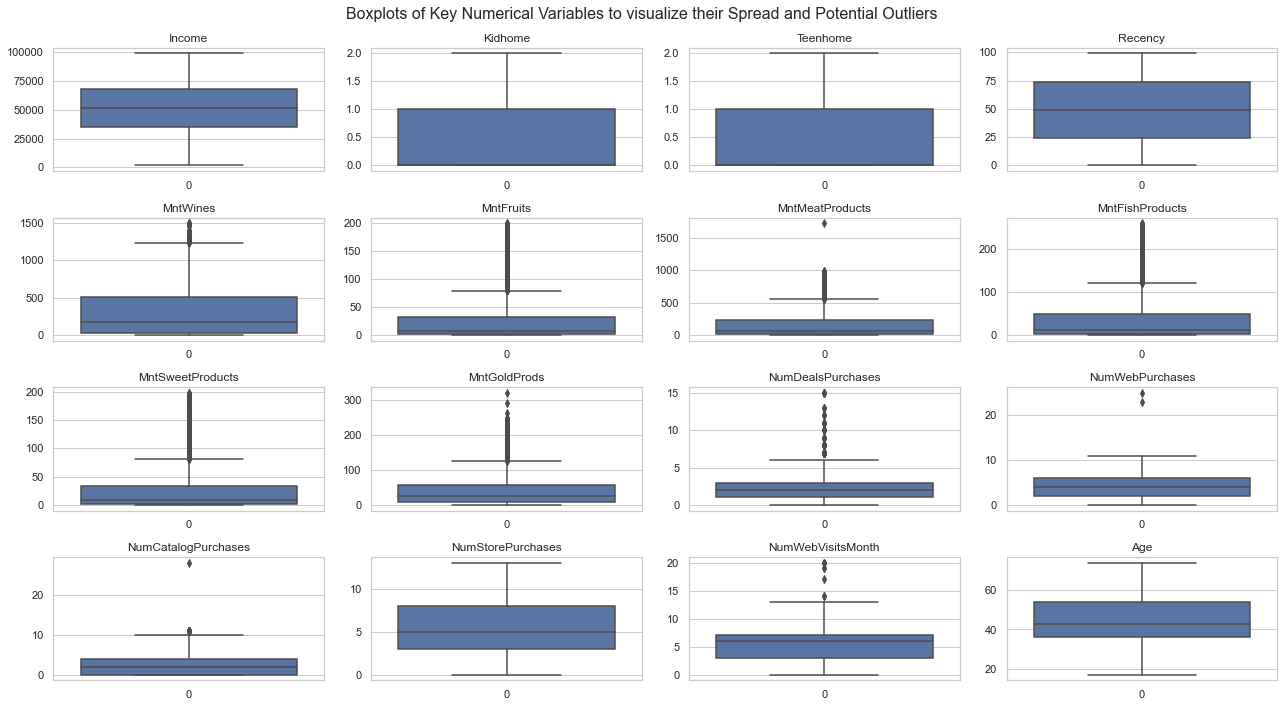

In [39]:
# Plot BoxPlots using multiple_subplots custom function.

subplot_list = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth','Age']
title = "Boxplots of Key Numerical Variables to visualize their Spread and Potential Outliers"
multiple_subplots(subplot_list, n_row=4, n_col=4, figsize=(18,10), suptitle=title, plot_type="boxplot", df=data)

We can observe quite a few outliers for purchase amount of some products. These could be true outliers and we should keep these as they could provide significant information about customer spending pattern and behavior.

### Analyze Probability Distributions and Formulate and Test hypothesis

To identify specific probability distribution for different variables, let us first bifurcate the relevant variables into two groups:
1. Discrete Variables
    - Response (Binary)
    - Complain (Binary) 
    
   
2. Continuous Variables
    - Income
    - MntFishProducts
    - MntMeatProducts
    - MntFruits
    - MntSweetProducts
    - MntWines
    - MntGoldProds


#### Discrete Variables:  

For this exercise, we will follow the following convention for determining the probability distribution for discrete data:  
Binary data: Check the assumptions. If the assumptions hold, we can infer that the data follows a Binomial Distribution.

#### Explanation and Inference w.r.t. each discrete variable: 

#### Binomial Distribution
##### Binary Data - Assumptions:
1. There are only two possible outcomes per trial. For example, yes or no, pass or fail, etc.
2. Each trial is independent. The outcome of one trial does not influence the outcome of another trial. For example, when you flip a coin, the result of one flip doesn’t affect the next flip.
3. The probability remains constant over time.
4. The number of trials is fixed.

##### Variables:  
 - Response
 - Complain  

These are the two binary variables in the data. Let us go through each assumption step  by step to confirm them and make our inference accordingly.
1. Two Possible Outcomes - Yes  
Each variable has only two possible outcomes; 1 and 0.    
2. Independent Trials - Yes  
One customer accepting the offer is independent of another customer's offer acceptance.
3. Constant Probability - Yes  
Each customer has an equal probability of either accepting or not-accepting the offer. Similar case for  a customer raising a complaint or not raising a complaint.  
4. Fixed Trials - Yes  
The final dataset contains a fixed number of rows. So we can assume here that the number of trials (records) are fixed.  

##### Inference:  
Based on the above analysis, we can infer that the 'Response' and 'Complain' variables follow the binomial probability distribution.

#### Calculation of probabilities and Expected Values for Binomial Distribution.

##### Calculation of Probabilities:  
Assumption:   
We make an assumption of a 50% probability for each trial. For every purchase that the customer makes, he/she has an equal probability of either accepting the offer or not accepting the offer (Response = 1 or 0 respectively) and raising a complaint or not raising a complaint (Complain = 1 or 0 respectively).

Therefore for both the variables viz. 'Response' and 'Complain',  
$$p = 0.5$$

##### Calculation of Expected Value:  
For a Binomial Distribution:  
$$E(X) = np$$  
where:  
n = number of independent bernoulli trials, in our case, n = total number of records = 2200    
p = probability of success in each trial, in our case, as defined above, p = 0.5

Therefore,  
$$E(X) = 2200 * 0.5 = 1100$$

#### Continuous Variables

##### Variables:
- Income
- MntFishProducts
- MntMeatProducts
- MntFruits
- MntSweetProducts
- MntWines
- MntGoldProds

#### Normal Distribution:

For the above continuous variables, we will check whether these follow normal distribution. For this, we will use the 'Shapiro-Wilk Test' to test our hypothesis that the data follows a normal distribution. We will also visulaize this using QQ (Quantile-Quantile) plot to confirm our hypothesis.

##### Formulate the Hypothesis:  
$H_0: $The data follow the Normal distribution.  
$H_1: $The data do not follow the Normal distribution.  

We will assume the significance level, $\alpha = 0.05$ for all the tests.     

In [40]:
# Hypothesis Testing

normality_check_list = ["Income", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds"]

test_result = []

for column in normality_check_list:
    # Use the custom function: shapiro_wilk_test_for_normality
    output = shapiro_wilk_test_for_normality(df=data, column_name=column, alpha=0.05)
    test_result.append(output)

# Create a result summary table
result_table = pd.DataFrame({"Variable": normality_check_list, "Test_Result": test_result})
result_table

,Variable,Test_Result
0,Income,Reject the Null Hypothesis. The data do not fo...
1,MntFishProducts,Reject the Null Hypothesis. The data do not fo...
2,MntMeatProducts,Reject the Null Hypothesis. The data do not fo...
3,MntFruits,Reject the Null Hypothesis. The data do not fo...
4,MntSweetProducts,Reject the Null Hypothesis. The data do not fo...
5,MntWines,Reject the Null Hypothesis. The data do not fo...
6,MntGoldProds,Reject the Null Hypothesis. The data do not fo...


From the above table, it can be observed that none of the continuous variables follow the normal distribution.   

Let us confirm this visually too using the QQ plot.

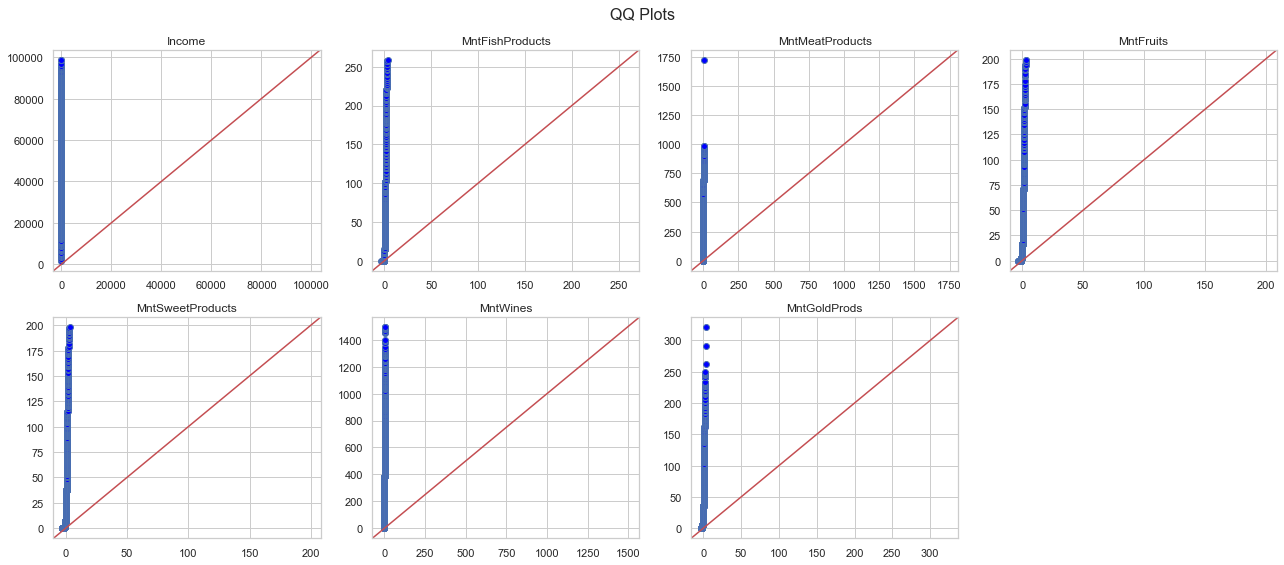

In [41]:
# Plot the QQ Plots using the multiple_subplots custom function.

subplot_list = ["Income", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds"]
title = "QQ Plots"
multiple_subplots(subplot_list, n_row=2, n_col=4, figsize=(18,8), suptitle=title, plot_type="qqplot", df=data)

It can be observed from the above visualization that none of the variables follow normal distribution which corroborates our inference from the Shapiro-Wilk Test.  

Also, let us have a quick look at the histogram of the continuous variables to see the shape of the distribution of data.

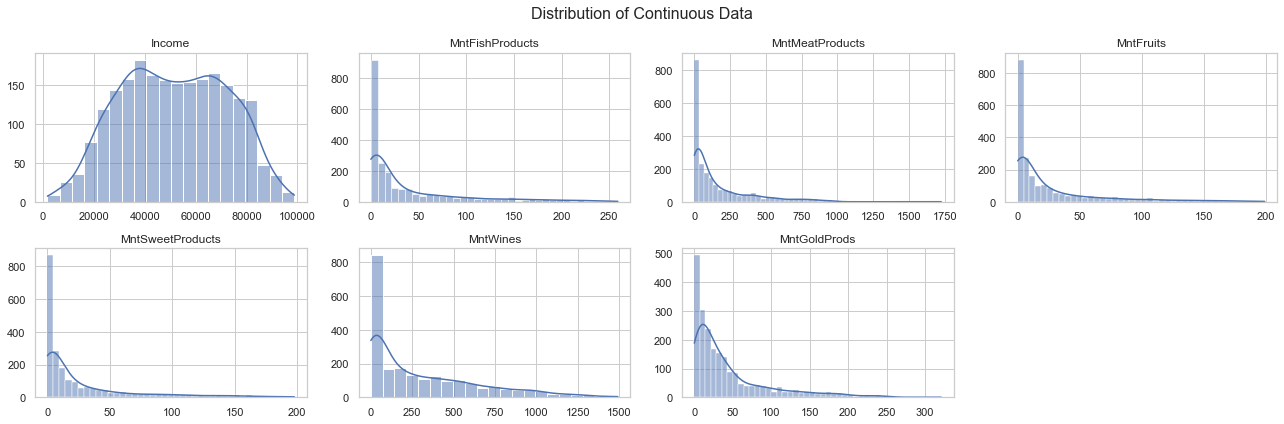

In [42]:
# Plot Histograms using the multiple_subplots custom function.

title = "Distribution of Continuous Data"
multiple_subplots(subplot_list, n_row=2, n_col=4, figsize=(18,6), suptitle=title, plot_type="histplot", df=data)

Even though the 'Income' data resembles a normal distribution, it is not a perfect normal distribution and hence failed the shapiro-wilk test for normality.

Note: It would be necessary to normalize this data for creating ML models and the like.

### In-depth data analysis through Visualizations and Insights drawn

In this section, we will explore the distribution and relationship between different variables through multiple visualizations such as scatter plot, bar plot, pie chart, point plot, histogram, heatmap and more.

##### Income vs. Total Amount Spent

Let us explore the relationship between Income and TotalAmountSpent using a regression plot and a heatmap.

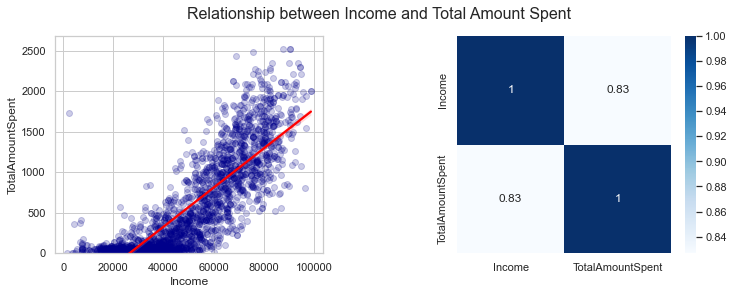

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (12,4))

fig.suptitle("Relationship between Income and Total Amount Spent", fontsize=16)

# Regression Plot
sns.regplot(x="Income", y="TotalAmountSpent", data=data, scatter_kws={"color":"darkblue", "alpha":0.2}, line_kws={"color":"red"}, ax=axes[0])
axes[0].set_ylim(0)

# Heatmap
sns.heatmap(data=data[["Income", "TotalAmountSpent"]].corr(), annot=True, cmap="Blues", ax=axes[1])

plt.subplots_adjust(wspace=0.5)

plt.show()

It can be observed that there is a strong positive correlation between income of the customer and the total amount spent by them, i.e. customers with higher income tend to spend more at the store.

##### Customer Demographics (Age, Education, Marital Status) vs. Total and Average Amount Spent

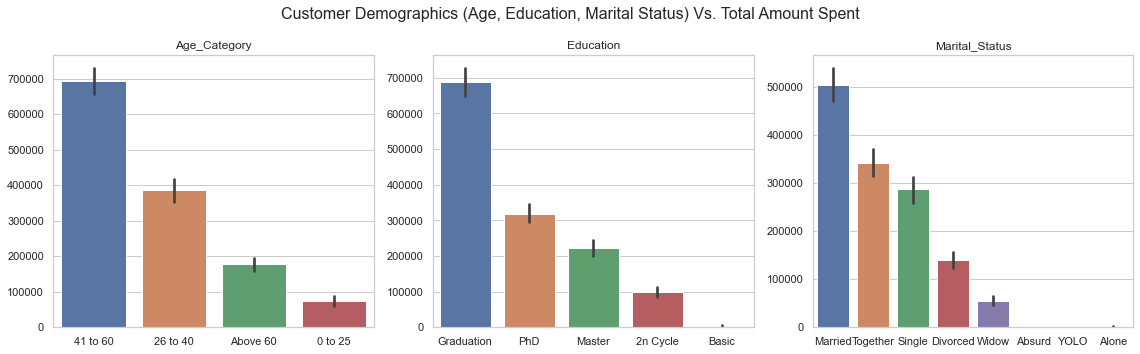

In [44]:
# Customer Demographics vs. Total Amount Spent (Standalone)

subplot_list = ["Age_Category", "Education", "Marital_Status"]
title = "Customer Demographics (Age, Education, Marital Status) Vs. Total Amount Spent"
multiple_subplots(subplot_list, 1, 3, (16,5), title, "barplot", data, common_y_variable="TotalAmountSpent", \
                      estimator="sum", suptitle_fontsize=16)

It can be observed that the highest total amount spent is by the following customer categories:
- Age_Category: 41 to 60 years
- Education: Graduation
- Marital_Status: Married

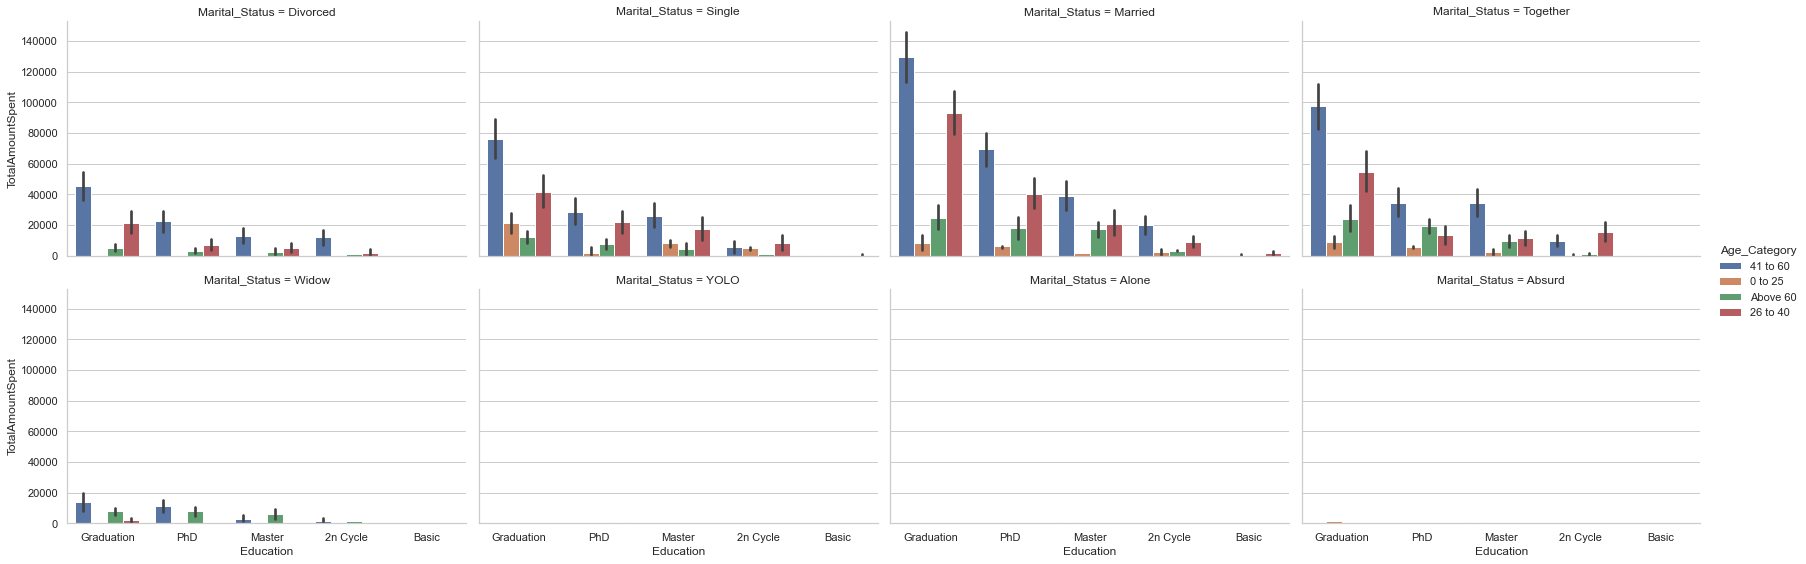

In [45]:
# Analyze Total Amount Spent w.r.t. Age, Education and Marital_Status (Combined)

order = data.groupby("Education")["TotalAmountSpent"].sum().sort_values(ascending=False).index
sns.catplot(x="Education", y="TotalAmountSpent", data=data, kind="bar", hue="Age_Category", col="Marital_Status",\
            height=4, aspect=1.5, col_wrap=4, estimator=sum, order=order)
plt.show()

The above visualization helps us understand the interaction between the Education, Age_Category and Marital_Status w.r.t. the TotalAmountSpent.  

In the 'Summary of Insights' section, the top 5 customer segments are presented w.r.t. the total amount spent by them.


Let us also do a similar analysis w.r.t. the average amount spent by different customer categories.

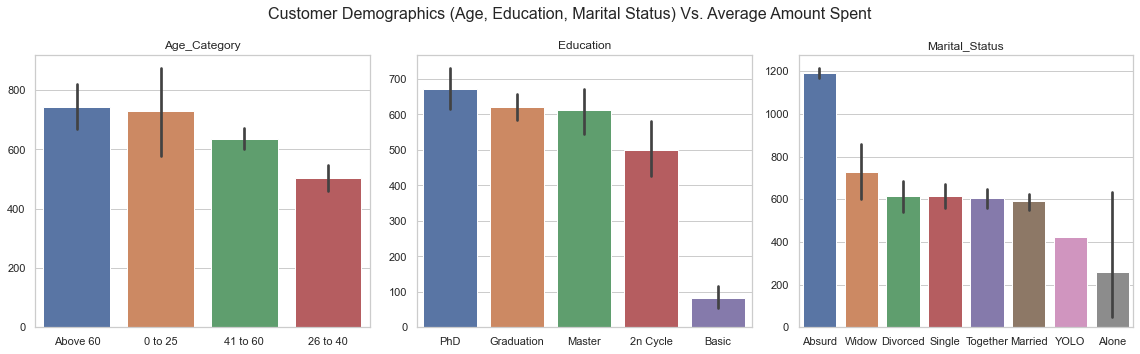

In [46]:
# Customer Demographics vs. Average Amount Spent (Standalone)

subplot_list = ["Age_Category", "Education", "Marital_Status"]
title = "Customer Demographics (Age, Education, Marital Status) Vs. Average Amount Spent"
multiple_subplots(subplot_list, 1, 3, (16,5), title, "barplot", data, common_y_variable="TotalAmountSpent", \
                      estimator="mean", suptitle_fontsize=16)

The average total amount spent by standalone categories of customer demographics produce quite different insights. It can be observed here that the highest average total amount spent is by the following customer categories:
- Age_Category: Above 60 years / 0 to 25 years
- Education: Phd with slightly less and almost equal Graduation and Master
- Marital_Status: Absurd

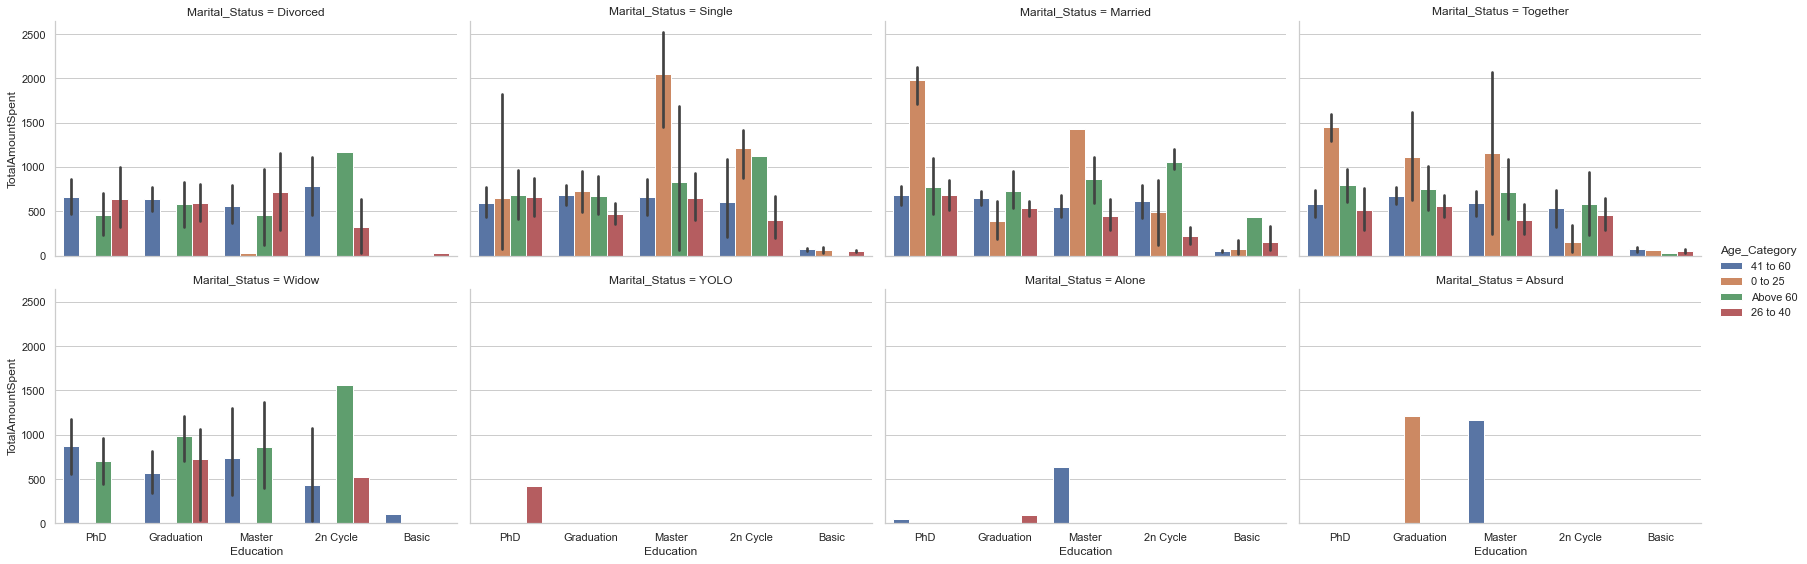

In [47]:
# Analyze Average Total Amount Spent w.r.t. Age, Education and Marital_Status (Combined)

order = data.groupby("Education")["TotalAmountSpent"].mean().sort_values(ascending=False).index
sns.catplot(x="Education", y="TotalAmountSpent", data=data, kind="bar", hue="Age_Category", col="Marital_Status",\
            height=4, aspect=1.5, col_wrap=4, estimator=np.mean, order=order)
plt.show()

When we analyze all the three variables together, we get quite different and interesting results w.r.t. average total amount spent than when we used the sum of TotalAmountSpent.  

In the 'Summary of Insights' section, the top 5 customer segments are presented w.r.t. the average amount spent by them.

##### Kidhome, Teenhome (i.e. number of children in customer's household) vs. Total Amount Spent

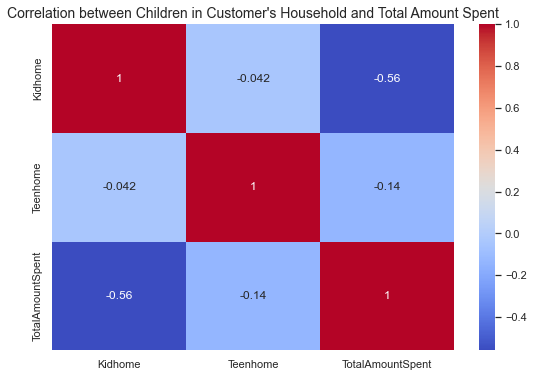

In [48]:
# Heatmap showing the relationship between Kidhome, Teenhome and Total Amount Spent.

plt.figure(figsize=(9,6))

sns.heatmap(data=data[["Kidhome", "Teenhome", "TotalAmountSpent"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Children in Customer's Household and Total Amount Spent", fontsize=14)

plt.show()

No significant relationship seems to exist between the number of children (small children or teens) in the customer's household and the total amount spent. 

##### Product Spend Distribution

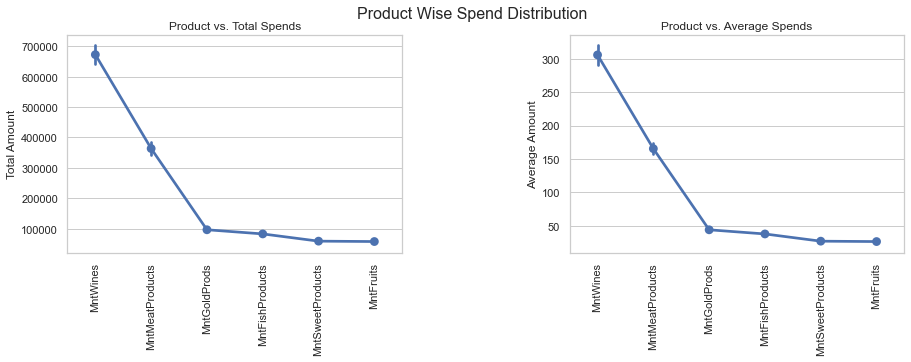

In [49]:
# Prepare the data
data_melted = pd.melt(data[["Education", "Marital_Status", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds", "Age_Category"]], \
                      id_vars=["Education", "Marital_Status", "Age_Category"], var_name="Product", value_name="Amount")

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

fig.suptitle("Product Wise Spend Distribution", fontsize=16)

# Sum plot
order1 = data_melted.groupby("Product")["Amount"].sum().sort_values(ascending=False).index
sns.pointplot(x=data_melted["Product"], y=data_melted["Amount"], ax=axes[0], estimator=sum, order=order1)
plot_labels("", "Total Amount", "Product vs. Total Spends", axes, 0)
axes[0].set_xticklabels(labels=order1, rotation=90)

# Average plot
order2 = data_melted.groupby("Product")["Amount"].mean().sort_values(ascending=False).index
sns.pointplot(x=data_melted["Product"], y=data_melted["Amount"], ax=axes[1], estimator=np.mean, order=order2)
plot_labels("", "Average Amount", "Product vs. Average Spends", axes, 1)
axes[1].set_xticklabels(labels=order2, rotation=90)

plt.subplots_adjust(wspace=0.5)

plt.show()

In terms of product wise spending habits, it can be observed that customers spend the most on Wines, followed by Meat products both in total as well as on an average. Customers tend to spend less on all the other products. This visulaization is important to understand customer preferences w.r.t. different products.

##### Customer Demographics (Age, Marital Status) vs. Product-wise Spends

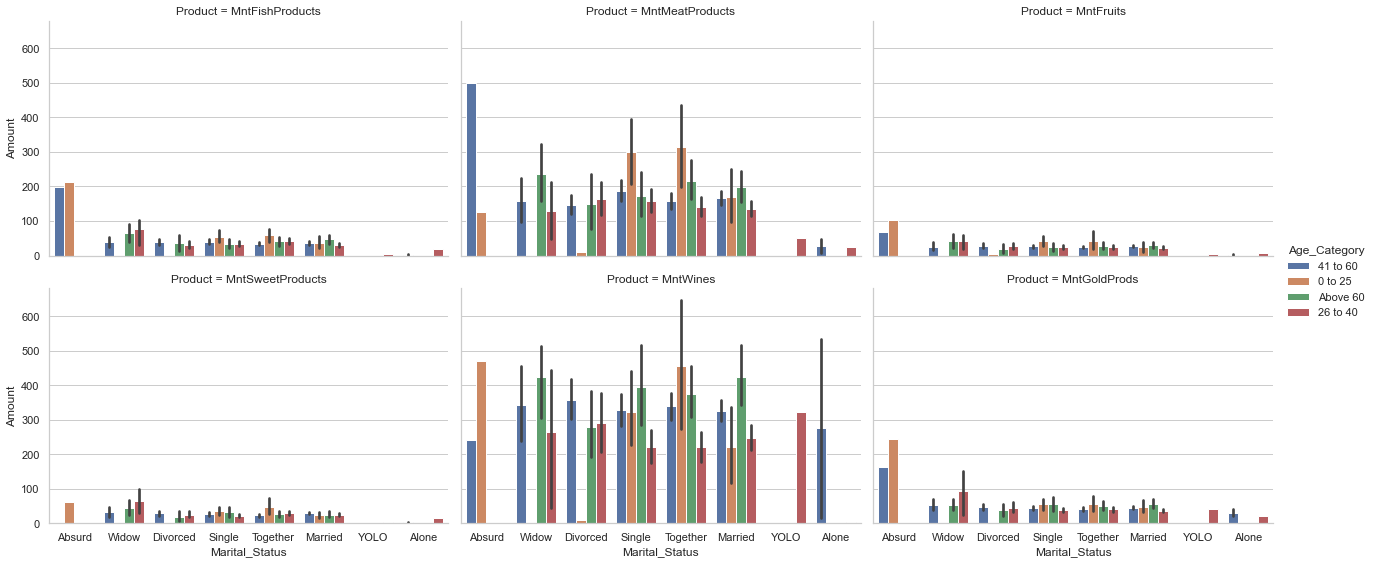

In [50]:
# Analyze Average amount spent on different products w.r.t. Age and Marital_Status.

order = data_melted.groupby("Marital_Status")["Amount"].mean().sort_values(ascending=False).index
sns.catplot(x="Marital_Status", y="Amount", data=data_melted, kind="bar", hue="Age_Category", col="Product",\
            height=4, aspect=1.5, col_wrap=3, estimator=np.mean, order=order)
plt.show()

Generally, it can be observed that all marital status categories spend highest on wines followed by meat products. Age category of 0 to 25 years are mostly single, married, together or absurd and they spend the most on these products, followed by customers of any marital status in the age group of above 60 years, 41-60 years and 26 to 40 years.

##### Analyze Customer's Mode of Purchase w.r.t. Offer Acceptance / Rejection

Let us analyze customer's mode of purchase from the following four categories:
- Purchases made when customers were offered a discount.
- Purchases directly made from:
    - Company's Product Catalog
    - In-Store
    - Company's Website
    
We will analyze this data w.r.t. acceptance or non-acceptance of campaign offer.

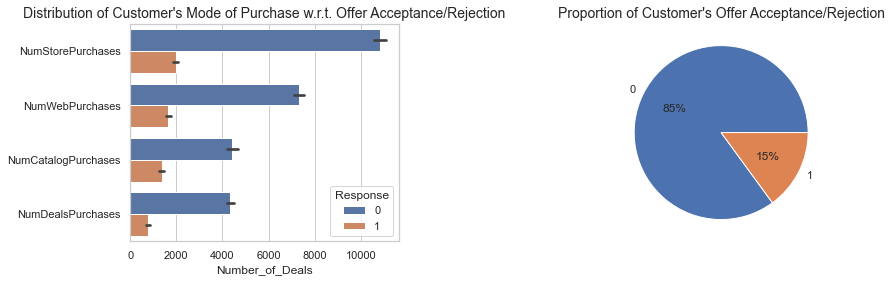

In [51]:
# Analyze mode of purchase, i.e. NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases w.r.t. Response.

# Prepare the data
data_melted_deals = pd.melt(data[["Education", "Marital_Status", "Age_Category", "Response", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]], \
                      id_vars=["Education", "Marital_Status", "Age_Category", "Response"], var_name="Mode_of_Purchase", value_name="Number_of_Deals")

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Bar Plot
order1 = data_melted_deals.groupby("Mode_of_Purchase")["Number_of_Deals"].sum().sort_values(ascending=False).index
sns.barplot(x="Number_of_Deals", y="Mode_of_Purchase", data=data_melted_deals, estimator=sum, hue="Response", orient="h", order=order1, ax=axes[0])
axes[0].set_title("Distribution of Customer's Mode of Purchase w.r.t. Offer Acceptance/Rejection", fontsize=14)
axes[0].set_ylabel("")

# Pie Chart
plt.subplot(1,2,2)
pie_data = data_melted_deals["Response"].value_counts()
plt.pie(x=pie_data.values, labels=pie_data.index, autopct="%.0f%%")
axes[1].set_title("Proportion of Customer's Offer Acceptance/Rejection", fontsize=14)

plt.subplots_adjust(wspace=0.7)

plt.show()

It can be observed from the above bar chart that the most preferred purchase mode was In-Store purchases, followed by Web purchases.  
The pie chart further tells us that only about 15% of customers accepted the offer in the last campaign and among the ones who accepted the offer, the highest proportion was of customers who made in-store purchases, followed by web purchases.


##### Number of Website Visits vs. Website Purchases

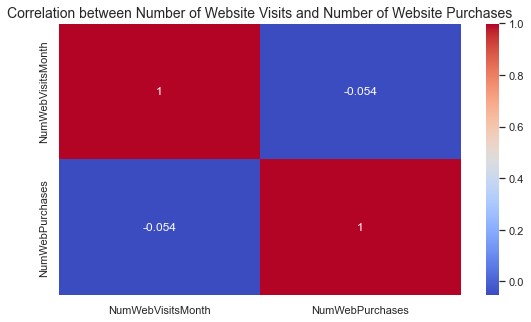

In [52]:
# Analyze relationship between NumWebVisitsMonth and NumWebPurchases using a Heatmap

plt.figure(figsize=(9,5))

sns.heatmap(data=data[["NumWebVisitsMonth", "NumWebPurchases"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Number of Website Visits and Number of Website Purchases", fontsize=14)

plt.show()

No significant relationship seems to exist between number of website visits and number of website purchases.

##### Analyze Customer Complaints to gauge Customer Satisfaction

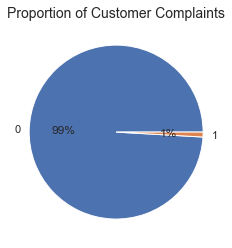

In [53]:
# Pie Chart displaying proportion of customer complaints.

pie_data = data["Complain"].value_counts()
plt.pie(x=pie_data.values, labels=pie_data.index, autopct="%.0f%%")
plt.title("Proportion of Customer Complaints", fontsize=14)

plt.show()

It can be observed that overall the customers are quite satisfied with the store's products and services as barely 1% of the customers have complained in the last 2 years.

##### Analyze Customer Purchase Recency

In [54]:
data["Recency"].describe()

count    2200.000000
mean       49.041818
std        28.932517
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

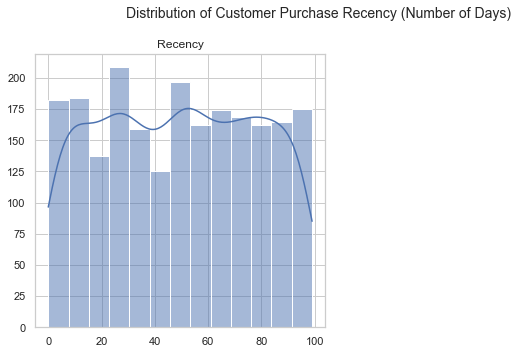

In [55]:
# Distribution of 'Recency' data.

to_plot = ["Recency"]
title = "Distribution of Customer Purchase Recency (Number of Days)"
multiple_subplots(to_plot, 1, 2, (9,5), title, "histplot", data, suptitle_fontsize=14)

There is no specific pattern in the recency data. Ideally the recency should have been positively skewed indicating an average to low recency as that would indicate a higher number of repeat / regular as well as new customers.   


### Summary of Insights:  
- Income is directly correlated with total amount spent, i.e. customers with higher income tend to spend more.
- In terms of total amount spent, it was observed that the highest spending customers are in the age group of 41 to 60 years (middle-aged), are graduates and married. Refer to the "Customer Ranking w.r.t. Total Amount Spent" table below.
- In terms of average total amount spent, the results were surprisingly different. Refer to the "Customer Ranking w.r.t. Average Amount Spent" table below.
- No significant relationship was observed between the number of children in the customer's household and the total amount spent by the customer.
- In terms of product wise spends, it was observed that the customers tend to spend the most on wines, followed by meat products.
- In terms of mode of purchase, it was observed that most of the customers preferred in-store purchases, followed by web purchases. 
- In terms of offer acceptance / rejection rates, it was observed that only 15% of customers accepted the offer and amongst those, the highest proportion was of customers who made in-store purchases, followed by web purchases.
- No significant relationship was observed between the number of website visits and website purchases. 
- It was observed that the overall customer satisfaction is quite high as a very small proportion (about 1%) of customers raised complaints in the last two years.
- No specific pattern was observed in the customer recency data. 

<div style="text-align: center; font-size: 15px; font-weight: bold;">Customer Ranking w.r.t. Total Amount Spent</div>

| Rank | Marital Status | Education | Age Category |  
|:-----: | :-----: | :-----: | :-----: |
| I | Married | Graduation | 41 to 60 years |
| II | Together | Graduation | 41 to 60 years |
| III | Married | Graduation | 26 to 40 years |
| IV | Single | Graduation | 41 to 60 years |
| V | Married | PhD | 41 to 60 years |

<div style="text-align: center; font-size: 15px; font-weight: bold;">Customer Ranking w.r.t. Average Amount Spent</div>

| Rank | Marital Status | Education | Age Category |  
|:-----: | :-----: | :-----: | :-----: |
| I | Single | Master | 0 to 25 years |
| II | Married | PhD | 0 to 25 years |
| III | Widow | 2n Cycle | Above 60 years |
| IV | Married/Together | Master/PhD | 0 to 25 years |
| V | Absurd | Graduation/Master | 0 to 25 years / 41 to 60 years |

### Recommendations

1. The company should focus more on higher income earning customers and offer good schemes / discounts thereby enticing them to spend more on the products.
2. It is important to focus on customer segments who spend more on an average as this will lead to an overall increase in revenue for the store if such customers visit the store more often. However, it is also important to continue focussing on existing customer segments who overall spend more as they will help maintain the current revenue.
3. The store should keep more stock of wines and meat products and ensure its availability at all times as customers tend to spend the most on these two products. 
4. Since most customers prefer in-store and web purchases, the store can convert the customers who did not accept the offer to potential customers by increasing their store's visibility online through marketing and offline by opening more stores in prominent areas.
5. The store should maintain their current product and service quality since the customers seem quite satisfied as could be gauged from a very small proportion (about 1%) of customer complaints in the last two years.
6. The store should focus on more schemes/offers/discounts to entice regular as well as new customers to visit the store / website more often and make purchases and reduce the gap between consecutive purchases.


### Conclusion

The Superstore Marketing Data provided a lot of information on customer spending habits and behavior. By breaking down each problem into bite-sized pieces, many different patterns and relationships between various features emerged. Clear visualizations were created to display the insights and actionable recommendations are suggested.  

Overall this project covered end-to-end data analysis tasks such as understanding the business problem, gathering data, cleaning data, removing outliers, analyzing the probability distributions, conducting hypothesis tests, performing exploratory data analysis, creating clear visualizations to highlight the insights from the analysis and suggesting actionable recommendations to the business.
